# Evaluation project 2 Of Phase 1 : Avocado Project

### Problem Statement:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.




##### Some relevant columns in the dataset:

    • Date - The date of the observation
    • AveragePrice - the average price of a single avocado
    • type - conventional or organic
    • year - the year
    • Region - the city or region of the observation
    • Total Volume - Total number of avocados sold
    • 4046 - Total number of avocados with PLU 4046 sold
    • 4225 - Total number of avocados with PLU 4225 sold
    • 4770 - Total number of avocados with PLU 4770 sold

##### Inspiration /Label 
        The dataset can be seen in two angles to find the region and find the average price .
        Task: One of Classification and other of Regression
        Do both tasks in the same .ipynb file and submit at single file. 
##### Dataset Link-
        •	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip

##### . import the required library

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
# read the csv data from below link with pandas
data=pd.read_csv("C:/Users/Arcturus/Downloads/avocado.csv/avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [52]:
# Check the columns of data
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [53]:
# drop the Unnamed column beacause this is use only unique id purpose.
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [54]:
# After drop Unnamed: 0 column print the column name
data.columns=['Date', 'AveragePrice', 'Total Volume', 'no_sold_4046', 'no_of_4225',
       'no_of_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region']

In [55]:
data

,Date,AveragePrice,Total Volume,no_sold_4046,no_of_4225,no_of_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [56]:
# check the shape of data
print(f'No. of rows : {data.shape[0]}')
print(f'No. of columns : {data.shape[1]}')

No. of rows : 18249
No. of columns : 13


#### Check Data type

In [57]:
# check the datatypes
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
no_sold_4046    float64
no_of_4225      float64
no_of_4770      float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

#### here we see
    

    • Date ,type or region is a object data type.
    • others are int or float data type.
 

In [58]:
# Date column is a object type .i have to convert in datetime type
data['Date'] = pd.to_datetime(data['Date'])

In [59]:
# Date split the year month or date and drop the Date and year column .
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day


In [60]:
# drop the Date and year column
data.drop(['Date','year','day'],axis=1,inplace=True)

In [61]:
data

,AveragePrice,Total Volume,no_sold_4046,no_of_4225,no_of_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1


#### Check Data Intigrity

In [62]:
# check the duplicates rows
data.duplicated().sum()


0

There is no any duplicate value in dataset.

#### Missing value check

In [63]:
# check the null values
null_values = data.isnull().sum().sort_values(ascending = False)
per_null =(null_values/len(data))*100
print(pd.concat([null_values, per_null], axis =1, keys =['Null Values', ' %NUll data']))

              Null Values   %NUll data
AveragePrice            0          0.0
Total Volume            0          0.0
no_sold_4046            0          0.0
no_of_4225              0          0.0
no_of_4770              0          0.0
Total Bags              0          0.0
Small Bags              0          0.0
Large Bags              0          0.0
XLarge Bags             0          0.0
type                    0          0.0
region                  0          0.0
Year                    0          0.0
Month                   0          0.0


<Axes: >

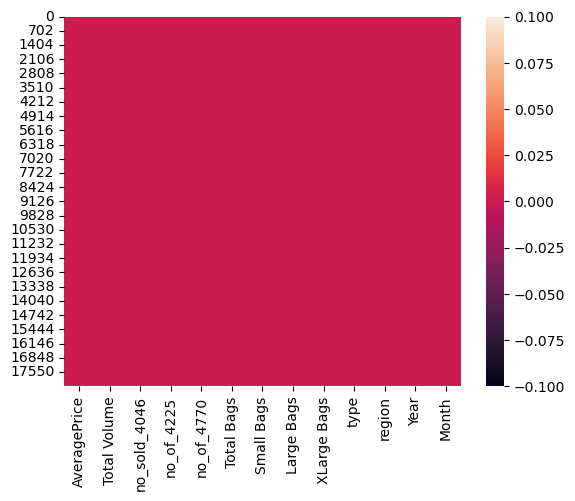

In [64]:
# lets visualization with heatmap for missing values
sns.heatmap(data.isnull())

##### here we see data does not have null values.

In [65]:
# Check the white spaces on data
data.isin([' ','?','-','null','NA']).sum().any()

False

there is no any white space in all column.

In [66]:
# check the frequency
for col in data.columns:
    print(data[col].value_counts())
    print('----------------------------------------')

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64
----------------------------------------
Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64
----------------------------------------
no_sold_4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64
----------------------------------------
no_of_4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: count, Length: 18103, dtype: int64
----------------

# Statistics of Dataset

In [67]:
data.describe()

,AveragePrice,Total Volume,no_sold_4046,no_of_4225,no_of_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


In [68]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
no_sold_4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
no_of_4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
no_of_4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
Year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


    Comment :
    • all column have same count number.
    • In mostly column mean is greater than median.so we can say that data is a right skewness.
    • all most column have huge diiference in 75% and max .so data contain a outliers.
    
    

# EDA And Visualization

### 1 . find the AveragePrice (Target Label or Regressor Problem)

In [69]:
data.head()

,AveragePrice,Total Volume,no_sold_4046,no_of_4225,no_of_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11


In [70]:
# check the value count of type feature
data['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

    here two types avocado 1 is conventional and other is organic . 
    lets more clearity visualize it.

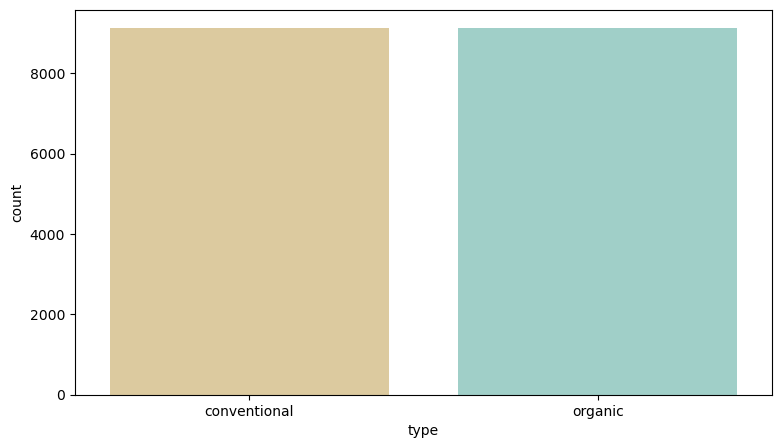

In [71]:
plt.figure(figsize=(9,5))
sns.countplot(data,x='type',palette='BrBG')
plt.show()

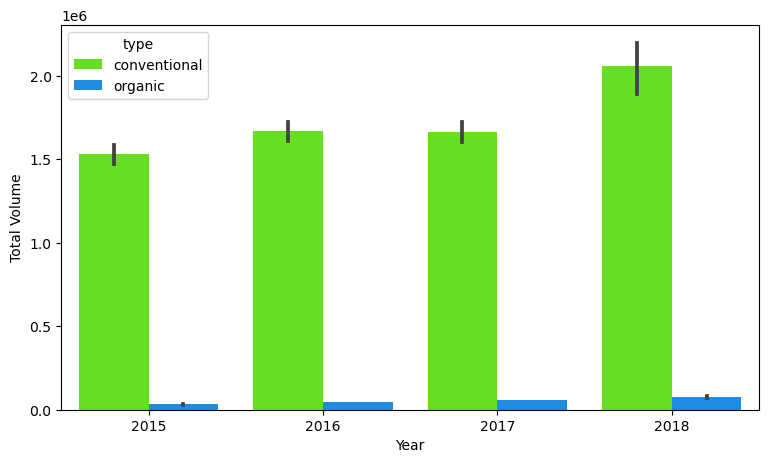

In [72]:
# relation b/w Year and Total Volume
plt.figure(figsize=(9,5))
sns.barplot(x='Year', y='Total Volume', hue='type',data=data, palette='gist_rainbow',ci=50)
plt.show()

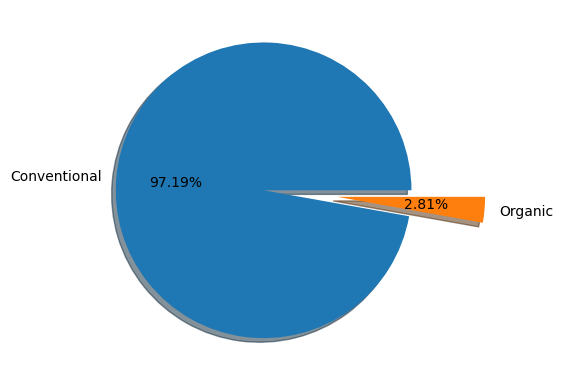

In [73]:
# Find in percentage
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(data.groupby('type')['Total Volume'].mean(),labels = labels,radius =1,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

    . here both plot we can see that Organic type sell aprox 3 %.
    . Conventional Avacado are in highly demand.
    . In all Year Conventional type highly sell compare to Organic type.

In [74]:
# lets check region wise 
result = data.groupby('region').agg({
    'Total Volume': 'sum',
    'AveragePrice': 'sum'
})
result = result.sort_values(by='Total Volume', ascending=False)
result

,Total Volume,AveragePrice
region,,
TotalUS,5.864740e+09,445.83
West,1.086779e+09,430.01
California,1.028982e+09,471.62
SouthCentral,1.011280e+09,372.22
Northeast,7.132809e+08,541.45
Southeast,6.152384e+08,472.53
GreatLakes,5.896425e+08,452.43
Midsouth,5.083494e+08,474.81
LosAngeles,5.078965e+08,411.01


    Here we see the high Total Volume in TotalUS region.
    and lowest in Syracuse region.

<Axes: xlabel='Year', ylabel='count'>

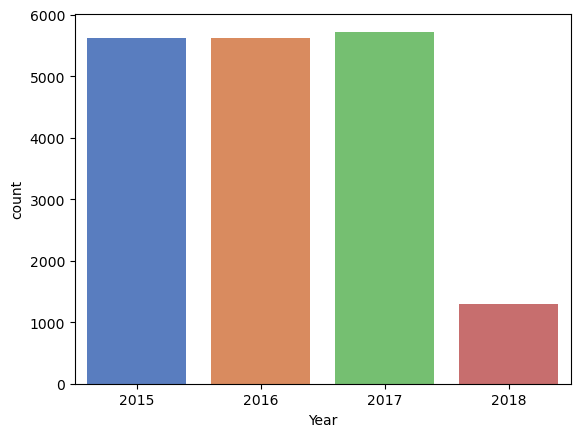

In [75]:
sns.countplot(data,x='Year',palette='muted')

Maximum sales entry belongs to year 2017 while very few sales entry comes from 2018.

###### Check distribution of data

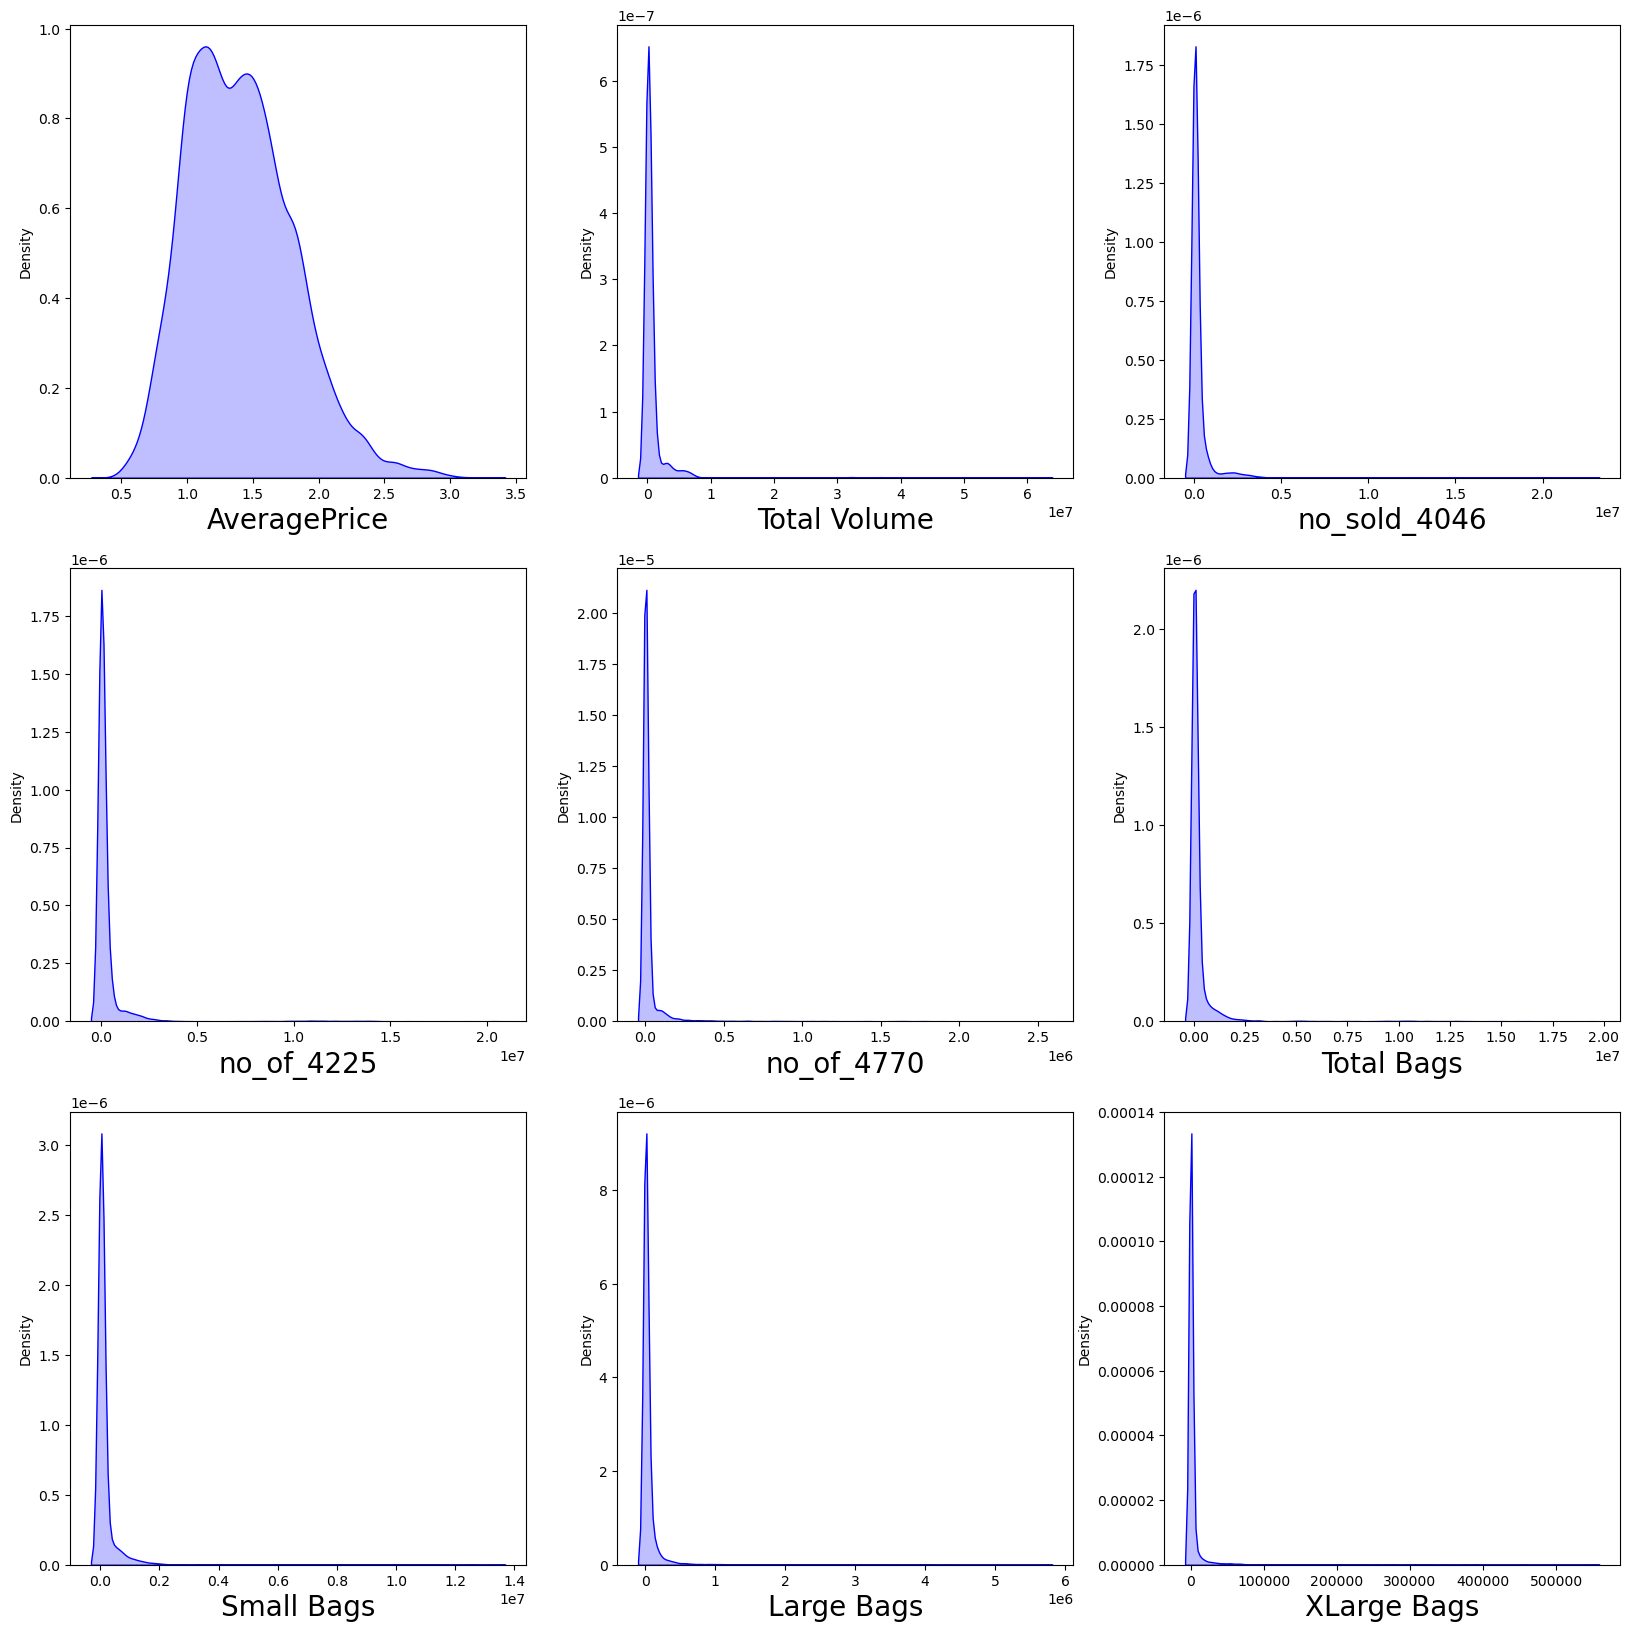

In [76]:
plt.figure(figsize=(20,20), facecolor='white')
col_no =1
for col in data:
    if col_no <=9:
        ax = plt.subplot(3,3,col_no)
        sns.kdeplot(data[col], color='b',shade=True)
        plt.xlabel(col,fontsize=20)
    col_no +=1
plt.show()

Here all columns have right skewness.

###### show the outliers with boxplot

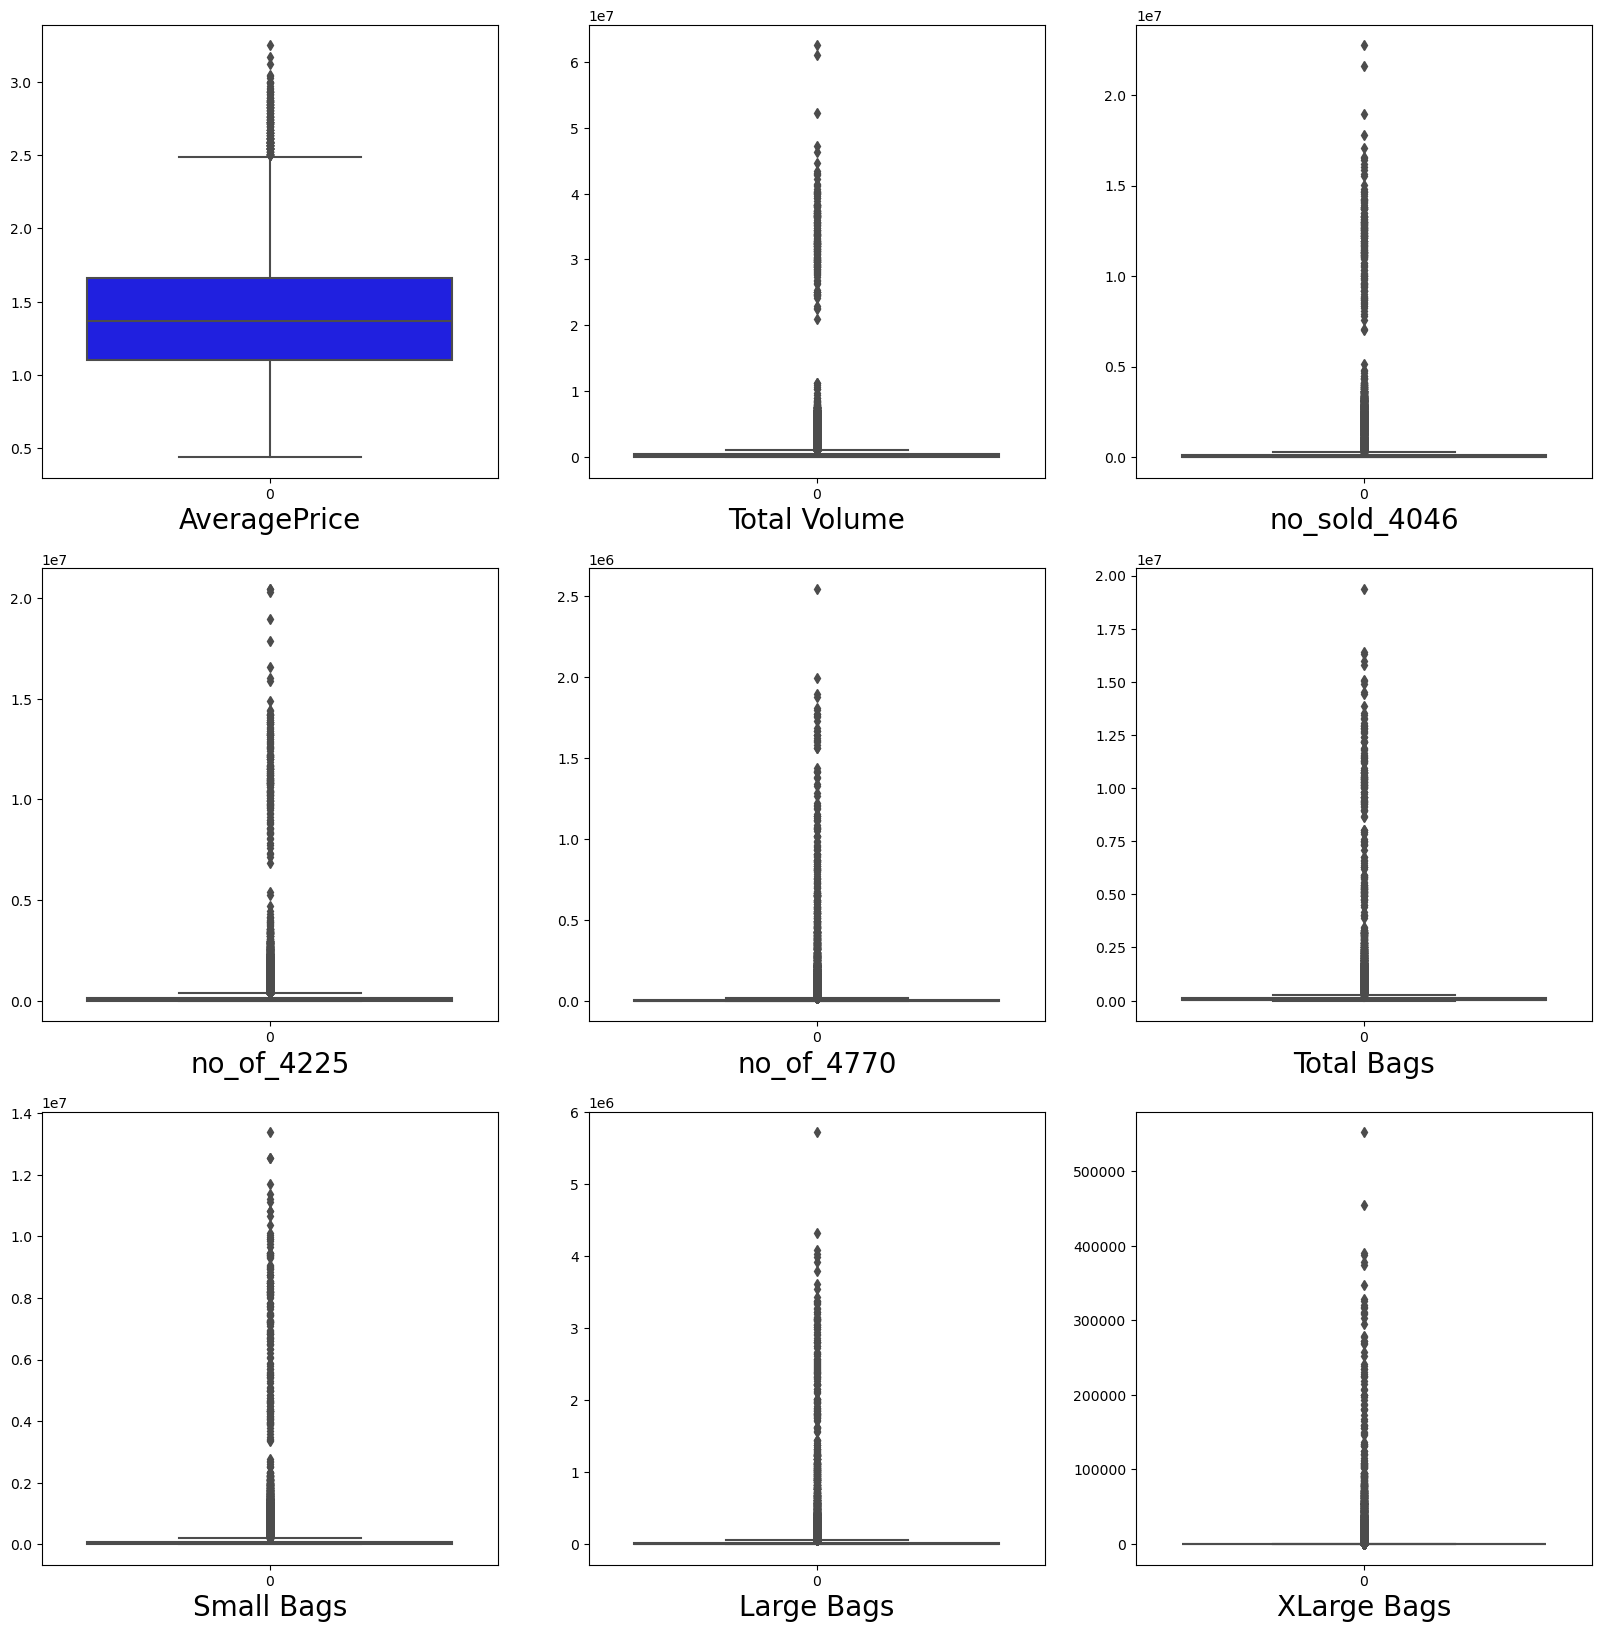

In [77]:
plt.figure(figsize=(20,20), facecolor='white')
col_no =1
for col in data:
    if col_no <=9:
        ax = plt.subplot(3,3,col_no)
        sns.boxplot(data[col], color='b')
        plt.xlabel(col,fontsize=20)
    col_no +=1
plt.show()

##### Comment :
    all the column have a outliers.
    

#### Encoded the Categorical Column

In [78]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

In [79]:
# Remove the outliers with zscore
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
df = data[(z<3).all(axis = 1)]

In [80]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df.shape)

Shape of dataset after removing outliers : (17651, 13)


In [81]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",(((data.shape[0])-(df.shape[0]))/data.shape[0])*100,'%')

Percentage Data Loss : 3.276891884486821 %


##### Check the skewness

In [82]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
no_sold_4046    4.909848
no_of_4225      4.455745
no_of_4770      5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
dtype: float64

The skewness range is (-0.5 to 0.5) correct.
but here we see Total Volume,no_sold_4046,no_sold_4225,no_of_4770,Total Bags,Small Bags,Large Bags, XLarge Bags have + skewness.

In [83]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
def rm_skew(col):
    df[col] = pt.fit_transform(df[[col]])
skew_column=['Total Volume','no_sold_4046','no_of_4225','no_of_4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for col in skew_column:
    rm_skew(col)

### Check the Correlation

In [85]:
df.corr()

,AveragePrice,Total Volume,no_sold_4046,no_of_4225,no_of_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
AveragePrice,1.000000,-0.580126,-0.554612,-0.453664,-0.493607,-0.564105,-0.489430,-0.484384,-0.393086,0.613150,-0.003242,0.091704,0.149502
Total Volume,-0.580126,1.000000,0.889248,0.924664,0.818545,0.941082,0.905795,0.682569,0.629882,-0.799821,0.068983,0.080706,-0.021861
no_sold_4046,-0.554612,0.889248,1.000000,0.764456,0.737191,0.800798,0.779462,0.603598,0.574335,-0.725000,0.162069,0.001350,-0.021731
no_of_4225,-0.453664,0.924664,0.764456,1.000000,0.797186,0.820596,0.786441,0.616089,0.584748,-0.747349,0.033926,-0.001524,-0.021967
no_of_4770,-0.493607,0.818545,0.737191,0.797186,1.000000,0.761056,0.753593,0.547691,0.616930,-0.780137,0.041295,-0.049934,-0.013533
Total Bags,-0.564105,0.941082,0.800798,0.820596,0.761056,1.000000,0.949975,0.729681,0.613741,-0.724752,0.071460,0.214666,-0.009209
Small Bags,-0.489430,0.905795,0.779462,0.786441,0.753593,0.949975,1.000000,0.566610,0.604123,-0.719063,0.057312,0.190267,-0.004761
Large Bags,-0.484384,0.682569,0.603598,0.616089,0.547691,0.729681,0.566610,1.000000,0.451305,-0.498894,0.089954,0.191742,-0.014694
XLarge Bags,-0.393086,0.629882,0.574335,0.584748,0.616930,0.613741,0.604123,0.451305,1.000000,-0.665473,-0.019668,0.161582,0.020729
type,0.613150,-0.799821,-0.725000,-0.747349,-0.780137,-0.724752,-0.719063,-0.498894,-0.665473,1.000000,0.018409,0.003867,-0.009499


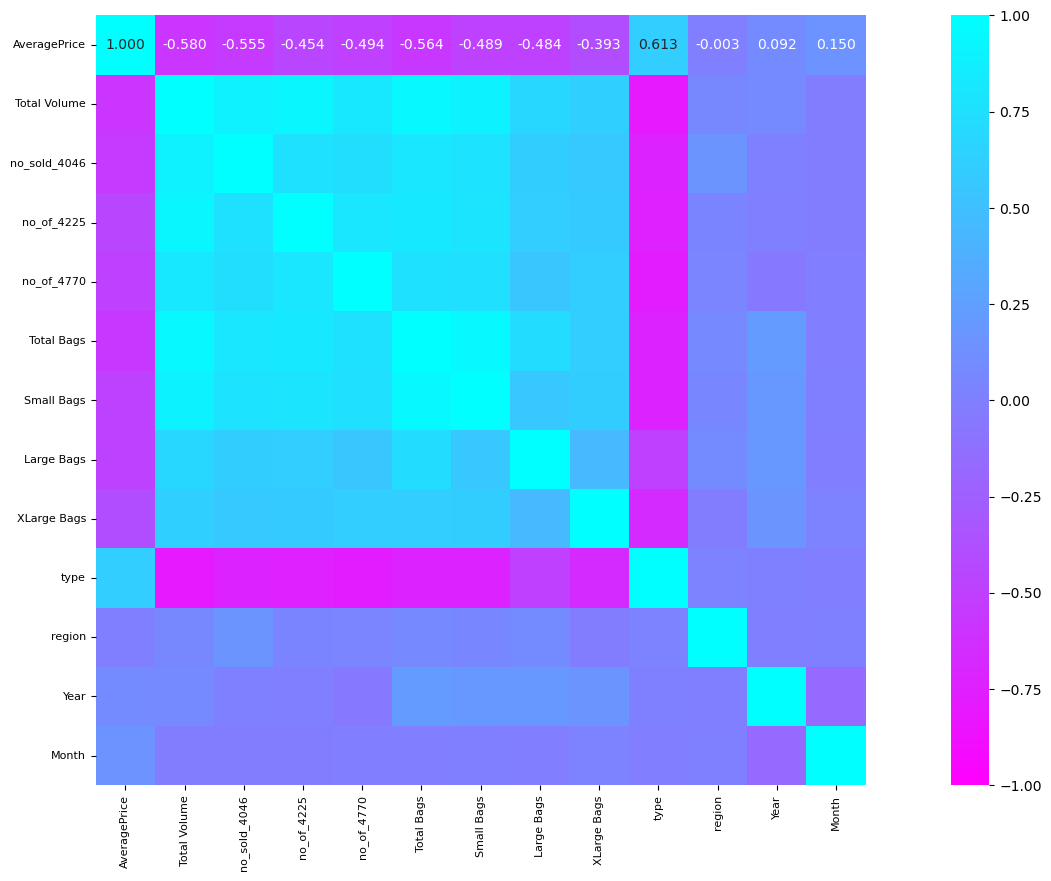

In [86]:
# Lets Visualize the correlation with heatmap
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool_r")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

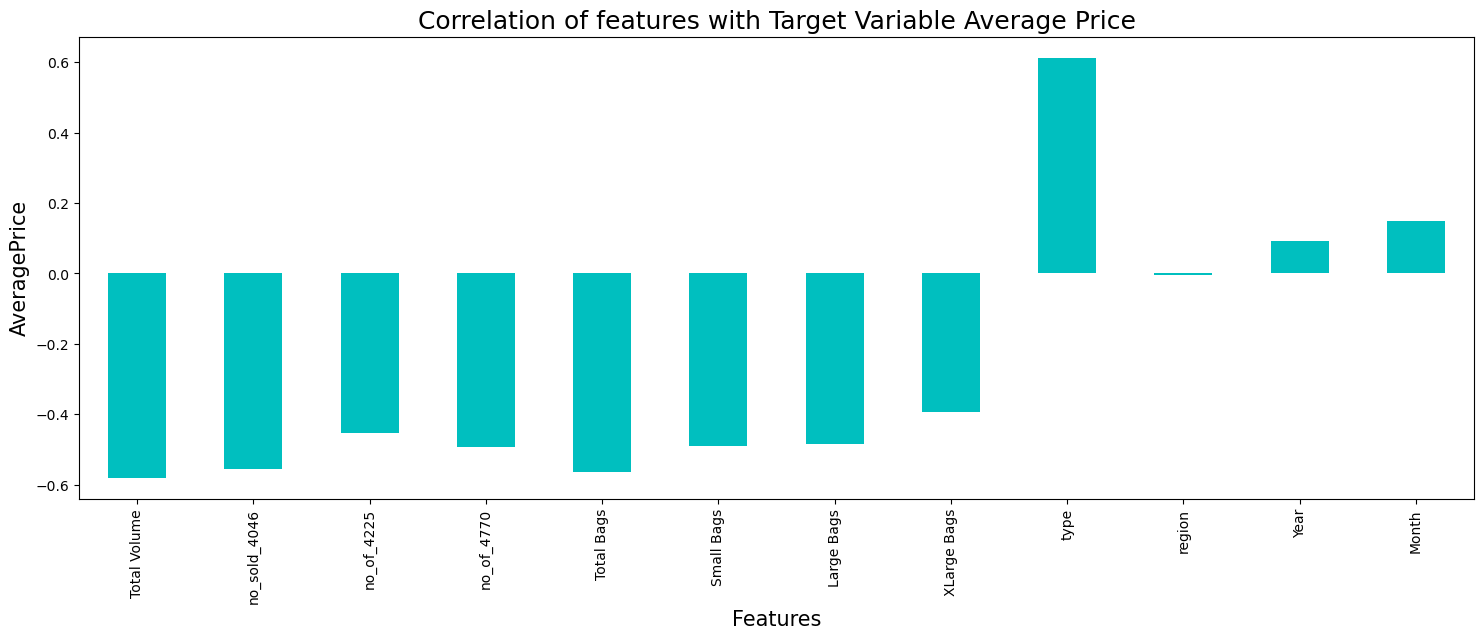

In [87]:
plt.figure(figsize = (18,6))
df.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

# Separate Feature and label

In [88]:
X=df.drop(['AveragePrice'],axis=1)

In [89]:
Y=df['AveragePrice']

In [90]:
print(f'Shape of X data : {X.shape}')
print(f'Shape of Y data : {Y.shape}')

Shape of X data : (17651, 12)
Shape of Y data : (17651,)


# Using StandardScalar

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X

,Total Volume,no_sold_4046,no_of_4225,no_of_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.695495,-1.210013,1.644612
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.695495,-1.210013,1.644612
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.695495,-1.210013,1.644612
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.695495,-1.210013,1.644612
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.695495,-1.210013,1.362113
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309,1.747054,1.980756,-1.180379
17647,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309,1.747054,1.980756,-1.462878
17648,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309,1.747054,1.980756,-1.462878
17649,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309,1.747054,1.980756,-1.462878


##### Checking Multicollinearity between features using variance_inflation_factor

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF values,Features
0,53.871113,Total Volume
1,7.258540,no_sold_4046
2,11.390177,no_of_4225
3,3.952991,no_of_4770
4,35.135075,Total Bags
5,16.627143,Small Bags
6,3.460369,Large Bags
7,2.055112,XLarge Bags
8,3.700346,type
9,1.086993,region


##### Comment :
    It is natural to have such high multicollinearity due to following reason :-
    Total Volume , Total BAgs,Small Bags,Large Bags,XLarge Bags are highly correlated with each other.
    Another most important reason is data need to scale which we did not scale until now.
    Strategy to Address Multicollinearity :
    Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
    Another way to address Multicollinerity is to Scaled Data and then apply PCA.
    We will go by Second way for further investigation.

# PCA

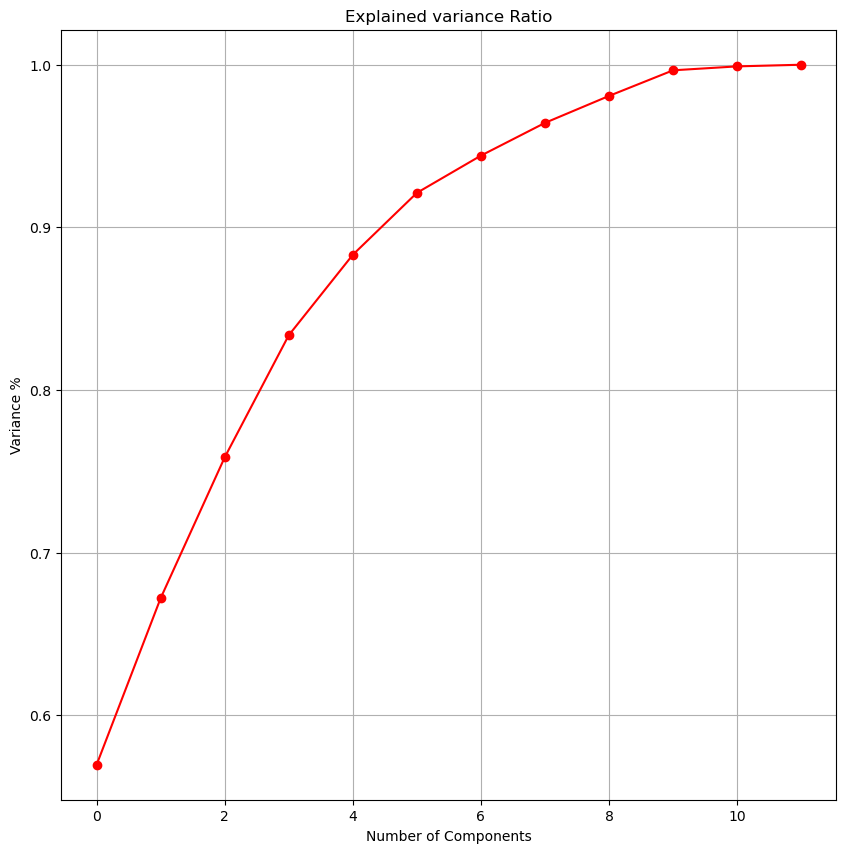

In [93]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x = pca.fit_transform(X)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

here we see the most distribution variance in 10 feature so we can apply only 10 feature rest can drop the feature.

In [94]:
pca_x = PCA(n_components=9)
x = pca_x.fit_transform(x)

In [95]:
rm_pca=pd.DataFrame(x,columns=np.arange(9))

#### Check VIF after PCA

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(rm_pca.values,i) for i in range(rm_pca.shape[1])]
vif['Features']= rm_pca.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8


We can observe the Multicollinearity issue has cleared

# Model Building For Regressor Problem

In [97]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

### Find the best random state

In [98]:
#  finding the best Random State for Linear Regression
max_cost_accuracy=0
random_state_max=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(rm_pca,Y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    pred_accuracy=r2_score(y_test,pred)
    if(max_cost_accuracy<pred_accuracy):
        max_cost_accuracy=pred_accuracy
        random_state_max=i

print(f"Maximum r2 score is {max_cost_accuracy} on Random_state {random_state_max} ")

Maximum r2 score is 0.5159498880553357 on Random_state 6 


In [99]:
#  finding the best Random State for RandomForest Regressor
max_cost_accuracy=0
random_state_max=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(rm_pca,Y,test_size=0.25,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    pred_accuracy=r2_score(y_test,pred)
    if(max_cost_accuracy<pred_accuracy):
        max_cost_accuracy=pred_accuracy
        random_state_max=i

print(f"Maximum r2 score is {max_cost_accuracy} on Random_state {random_state_max} ")

Maximum r2 score is 0.8756161567424587 on Random_state 83 


here we observe that best accuracy with RandomForestRegressor on 83 random state.

In [100]:
x_train,x_test,y_train,y_test=train_test_split(rm_pca,Y,test_size=0.25,random_state=83)


In [101]:
# Accuracy check with RandomForest Regressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print(rfr)
print('R2_score',r2_score(y_test,pred_rfr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_rfr))
print("Mean Squared error: ",mean_squared_error(y_test,pred_rfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rfr)))

RandomForestRegressor()
R2_score 0.874421040910258
R2_score on training Data: 98.05553923824546
Mean Absolute Error : 0.09858470428280079
Mean Squared error:  0.018560658882846127
Root Mean Squared Error: 0.13623750908925972


In [102]:
# Accuracy check with KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_score',r2_score(y_test,pred_knn))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_knn))
print("Mean Squared error: ",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score 0.870400916129757
R2_score on training Data: 91.8815885466937
Mean Absolute Error : 0.09853387718105597
Mean Squared error:  0.019154836165873552
Root Mean Squared Error: 0.13840099770548459


In [103]:
# Accuracy check with SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print('R2_score',r2_score(y_test,pred_svr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_svr))
print("Mean Squared error: ",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

SVR()
R2_score 0.7867717756475769
R2_score on training Data: 79.0604779797839
Mean Absolute Error : 0.13337401761871964
Mean Squared error:  0.03151528221835366
Root Mean Squared Error: 0.17752544104537146


In [104]:
# Accuracy check with GradientBoosting Regressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print(gbr)
print('R2_score',r2_score(y_test,pred_gbr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_gbr))
print("Mean Squared error: ",mean_squared_error(y_test,pred_gbr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_gbr)))


GradientBoostingRegressor()
R2_score 0.6792813659784512
R2_score on training Data: 70.38636678738325
Mean Absolute Error : 0.16833025844093263
Mean Squared error:  0.04740244071614214
Root Mean Squared Error: 0.21772101578888095


In [105]:
# Accuracy check with Lasso
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print(ls)
print('R2_score',r2_score(y_test,pred_ls))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_ls))
print("Mean Squared error: ",mean_squared_error(y_test,pred_ls))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_ls)))

Lasso()
R2_score -0.0005877967920138172
R2_score on training Data: 0.0
Mean Absolute Error : 0.3151378958807684
Mean Squared error:  0.14788758334366667
Root Mean Squared Error: 0.3845615468864076


In [106]:
# Accuracy check with Ridge
rg=Ridge()
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print(rg)
print('R2_score',r2_score(y_test,pred_rg))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_rg))
print("Mean Squared error: ",mean_squared_error(y_test,pred_rg))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rg)))

Ridge()
R2_score 0.48444508773385253
R2_score on training Data: 49.99049943449578
Mean Absolute Error : 0.21729409725267915
Mean Squared error:  0.0761993803047001
Root Mean Squared Error: 0.2760423523749573


In [107]:
# Accuracy check with DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print('R2_score',r2_score(y_test,pred_dtr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error: ",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score 0.7081635878426669
R2_score on training Data: 100.0
Mean Absolute Error : 0.13870609562655786
Mean Squared error:  0.043133627917516425
Root Mean Squared Error: 0.2076863691182366


### Cross Validation score check for above model

In [108]:
# Cross validation with Random Forest Regressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfr,rm_pca,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rfr)-score.mean())*100)

[-0.49580568  0.50255772  0.60126674  0.21183905  0.00798055]
0.1655676772193371
Difference between R2 score and cross validation score is : 70.88533636909209


In [109]:
# Cross validation with SVR
score=cross_val_score(svr,rm_pca,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_svr)-score.mean())*100)

[-1.00493381  0.44026832 -0.00321643  0.2721998  -0.10598911]
-0.08033424647175968
Difference between R2 score and cross validation score is : 86.71060221193366


In [110]:
#  Cross validation with KNN
score=cross_val_score(knn,rm_pca,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_knn)-score.mean())*100)

[-0.52981296  0.24149696  0.39721057 -0.05483662 -0.15714686]
-0.020617779455996587
Difference between R2 score and cross validation score is : 89.10186955857536


In [111]:
# Cross validation with GradientBoosting Regressor
score=cross_val_score(gbr,rm_pca,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_gbr)-score.mean())*100)

[-0.75996548  0.45927279  0.516244    0.16921652  0.23500287]
0.12395414032724239
Difference between R2 score and cross validation score is : 55.532722565120885


In [112]:
# Cross validation with Lasso
score=cross_val_score(ls,rm_pca,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_ls)-score.mean())*100)

[-3.85189856 -0.63909317 -0.04763459 -0.44449249 -0.80022956]
-1.156669674837169
Difference between R2 score and cross validation score is : 115.60818780451552


In [113]:
# Cross validation with Ridge
score=cross_val_score(rg,rm_pca,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rg)-score.mean())*100)

[-0.61955968  0.179907    0.38557551  0.10609792  0.15460091]
0.041324330492195194
Difference between R2 score and cross validation score is : 44.31207572416574


In [114]:
# Cross validation with Decision Tree Regressor
score=cross_val_score(dtr,rm_pca,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_dtr)-score.mean())*100)

[-1.2934849   0.09189092  0.04338688 -0.44443416 -0.52477477]
-0.4254832041022952
Difference between R2 score and cross validation score is : 113.3646791944962


In [116]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(estimator=None, n_estimators=30, max_samples=0.9, max_features=1.0, bootstrap=True, 
                      bootstrap_features=True, oob_score=True, warm_start=False, n_jobs=1, random_state=42, verbose=5)
br.fit(x_train, y_train)
y_pred_br = br.predict(x_test)
print('Accuracy : ',r2_score(y_test,y_pred_br))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 30 for this parallel run (total 30)...
Building estimator 2 of 30 for this parallel run (total 30)...
Building estimator 3 of 30 for this parallel run (total 30)...
Building estimator 4 of 30 for this parallel run (total 30)...
Building estimator 5 of 30 for this parallel run (total 30)...
Building estimator 6 of 30 for this parallel run (total 30)...
Building estimator 7 of 30 for this parallel run (total 30)...
Building estimator 8 of 30 for this parallel run (total 30)...
Building estimator 9 of 30 for this parallel run (total 30)...
Building estimator 10 of 30 for this parallel run (total 30)...
Building estimator 11 of 30 for this parallel run (total 30)...
Building estimator 12 of 30 for this parallel run (total 30)...
Building estimator 13 of 30 for this parallel run (total 30)...
Building estimator 14 of 30 for this parallel run (total 30)...
Building estimator 15 of 30 for this parallel run (total 30)...
Building estimator 16 of 30 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [117]:
from math import sqrt
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 350,
         'num_leaves': 31,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.85,
         'bagging_freq': 1,
         'feature_fraction': 0.55
         }

lgbm = lgb.train(params=param,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(x_test)
print('accuracy : ',r2_score(y_test,y_pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 13238, number of used features: 9
[LightGBM] [Info] Start training from score 1.407694
accuracy :  0.8516395057525885


Among all Model Random Forest Regressor gave us maximum R2 score of 0.87 and minimum RMSE value of 0.147. So We will perform Hyper Parameter Tuning on Random Forest Regressor.

# Hyper Parameter Tuning : GridSearchCV

In [118]:
# RandomForest Regressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[20,44],'max_depth': [0,10],
             'min_samples_leaf':[5,10],'criterion':['squared_error','absolute_error'],
             'max_features':["auto","sqrt","log2"],
             'ccp_alpha':[0.1,0.0]}

In [ ]:
gcv=GridSearchCV(RandomForestRegressor(),parameters,cv=5,verbose=3)
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=auto, min_samples_leaf=5, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=auto, min_samples_leaf=5, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=auto, min_samples_leaf=5, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=auto, min_samples_leaf=5, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=auto, min_samples_leaf=5, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=auto, min_samples_leaf=5, n_estimators=44;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1

[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=20;, score=-0.000 total time=   0.6s
[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=20;, score=-0.000 total time=   0.5s
[CV 3/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=20;, score=-0.000 total time=   0.6s
[CV 4/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=20;, score=-0.001 total time=   0.5s
[CV 5/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=20;, score=-0.000 total time=   0.5s
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=44;, score=-0.000 total time=   1.2s
[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=1

[CV 1/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=44;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=44;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=44;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=44;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, n_estimators=44;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, n_estimators=20;, score=-0.002 total time=  25.6s
[CV 2/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, 

In [75]:
gcv.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 44}

In [86]:
final_model=RandomForestRegressor(criterion='squared_error',max_depth=10,n_estimators=44,ccp_alpha=0.0,max_features='sqrt',min_samples_leaf=5)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
R2_score=r2_score(y_test,pred)
print('R2 Score : ',R2_score*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred))
print("Mean Squared error: ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score :  75.00163001000246
Mean Absolute Error : 0.149588611904626
Mean Squared error:  0.037975192042378626
Root Mean Squared Error: 0.19487224543884804


 True Values Vs Predicted Value plot :


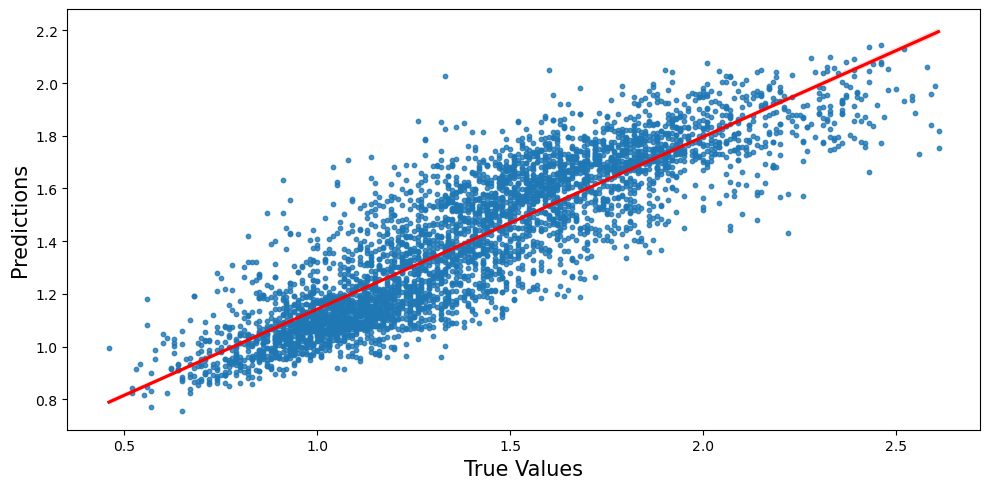

In [85]:
y_pred = final_model.predict(x_test)

y_test = y_test.round(2)

plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"s": 10}, line_kws={"color": "red"})
print('\033[1m' + ' True Values Vs Predicted Value plot :' + '\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()

# Saving the model

In [87]:
import joblib
joblib.dump(final_model,"Avacado_cost.pkl")

['Avacado_cost.pkl']

In [88]:
# lets load the saved model and get the predictions
model=joblib.load("Avacado_cost.pkl")

# prediction
prediction=model.predict(x_test)
prediction

array([1.63541132, 1.07938607, 1.17366738, ..., 1.49053978, 1.54669806,
       1.13674402])

In [89]:
# compare with the actual test
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1.635411,1.50
1,1.079386,1.13
2,1.173667,1.04
3,1.125255,1.15
4,1.733479,1.56
...,...,...
4408,1.087519,0.89
4409,1.588987,1.55
4410,1.490540,1.64
4411,1.546698,1.53


#### Conclusion:

    In this project, we developed a regression model to predict avocado prices based on various features such as region, type, year, and volume of sales. Among the models tested, RandomForestRegressor provided the most accurate predictions. We fine-tuned the hyperparameters, including list key hyperparameters, e.g., number of estimators, criterion,ccp_alpha parameters, to enhance the model's performance.

    The final model achieved a mean absolute error (MAE) of 0.14 and demonstrated strong predictive capabilities across different regions and time periods. The results highlight the effectiveness of machine learning in forecasting commodity prices, offering valuable insights for stakeholders in the avocado market.

# 2 . Find the Region Target Variable

In [12]:
# read the csv data from below link with pandas
import pandas as pd
data_class=pd.read_csv("C:/Users/Arcturus/Downloads/avocado.csv/avocado.csv")
data_class

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [13]:
# drop the Unnamed column beacause this is use only unique id purpose.
data_class.drop(['Unnamed: 0'],axis=1,inplace=True)

In [14]:
# After drop Unnamed: 0 column print the column name
data_class.columns=['Date', 'AveragePrice', 'Total Volume', 'no_sold_4046', 'no_of_4225',
       'no_of_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region']

In [15]:
# check the datatypes
data_class.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
no_sold_4046    float64
no_of_4225      float64
no_of_4770      float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

here we see Date,type and region is object rest are float or int data type.

In [16]:
# Date column is a object type .i have to convert in datetime type
data_class['Date'] = pd.to_datetime(data_class['Date'])

In [17]:
# Date split the year month or date and drop the Date and year column .
data_class['Year'] = data_class['Date'].dt.year
data_class['Month'] = data_class['Date'].dt.month


In [18]:
# drop the Date and year column
data_class.drop(['Date','year'],axis=1,inplace=True)

In [19]:
data_class.shape

(18249, 13)

In [20]:
# Check the value count
for col in data_class.columns:
    print(data_class[col].value_counts())
    print("=="*30)

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64
Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64
no_sold_4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64
no_of_4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: count, Length: 18103, dtype: int64
no_of_4770
0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01   

##### here we see region is categorical and this is a target variable so we can say that, this is a multi class classfication problem.

Allmost EDA have completed in above task.

#### Checked the outliers

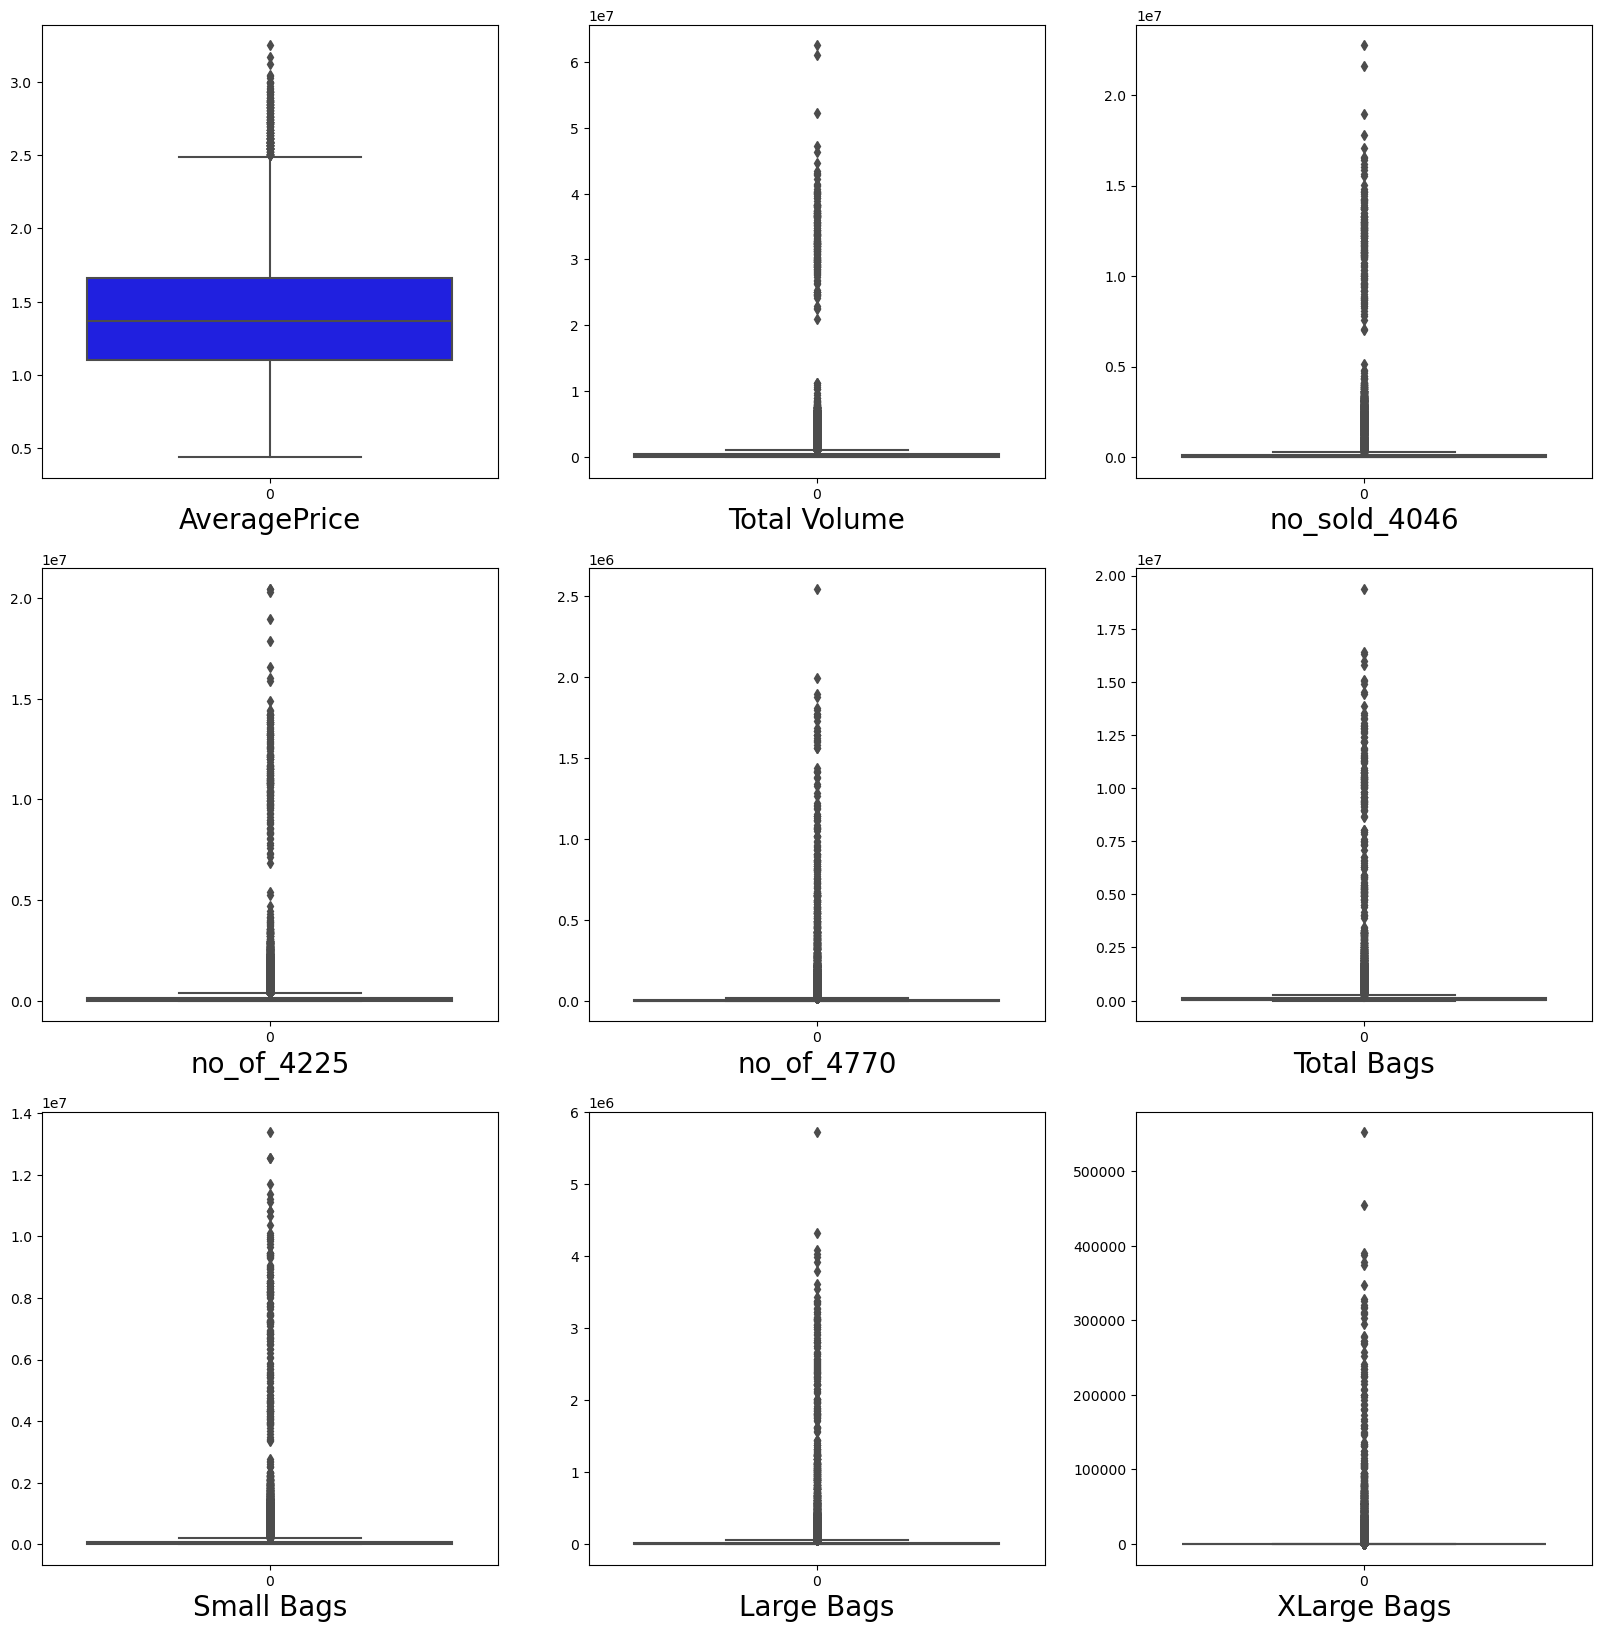

In [21]:
plt.figure(figsize=(20,20), facecolor='white')
col_no =1
for col in data_class:
    if col_no <=9:
        ax = plt.subplot(3,3,col_no)
        sns.boxplot(data_class[col], color='b')
        plt.xlabel(col,fontsize=20)
    col_no +=1
plt.show()

In [22]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data_class.columns:
    if data_class[col].dtype=='object':
        data_class[col]=le.fit_transform(data_class[col])

In [23]:
# Remove the outliers with zscore
from scipy.stats import zscore
z = np.abs(zscore(data_class))
threshold = 3
df_class = data_class[(z<3).all(axis = 1)]

In [24]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df_class.shape)

Shape of dataset after removing outliers : (17651, 13)


In [25]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",(((data_class.shape[0])-(df_class.shape[0]))/data_class.shape[0])*100,'%')

Percentage Data Loss : 3.276891884486821 %


### Checked the skewness

In [26]:
df_class.skew()

AveragePrice    0.377432
Total Volume    3.767138
no_sold_4046    4.909848
no_of_4225      4.455745
no_of_4770      5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
dtype: float64

The skewness range is (-0.5 to 0.5) correct. but here we see Total Volume,no_sold_4046,no_sold_4225,no_of_4770,Total Bags,Small Bags,Large Bags, XLarge Bags have + skewness.

In [27]:
# Remove the skewness using PowerTransformer
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
def rm_skew(col):
    df_class[col] = pt.fit_transform(df_class[[col]])
skew_column=['Total Volume','no_sold_4046','no_of_4225','no_of_4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for col in skew_column:
    rm_skew(col)

#### Checked the correlation

In [28]:
df_class.corr()

,AveragePrice,Total Volume,no_sold_4046,no_of_4225,no_of_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
AveragePrice,1.000000,-0.580126,-0.554612,-0.453664,-0.493607,-0.564105,-0.489430,-0.484384,-0.393086,0.613150,-0.003242,0.091704,0.149502
Total Volume,-0.580126,1.000000,0.889248,0.924664,0.818545,0.941082,0.905795,0.682569,0.629882,-0.799821,0.068983,0.080706,-0.021861
no_sold_4046,-0.554612,0.889248,1.000000,0.764456,0.737191,0.800798,0.779462,0.603598,0.574335,-0.725000,0.162069,0.001350,-0.021731
no_of_4225,-0.453664,0.924664,0.764456,1.000000,0.797186,0.820596,0.786441,0.616089,0.584748,-0.747349,0.033926,-0.001524,-0.021967
no_of_4770,-0.493607,0.818545,0.737191,0.797186,1.000000,0.761056,0.753593,0.547691,0.616930,-0.780137,0.041295,-0.049934,-0.013533
Total Bags,-0.564105,0.941082,0.800798,0.820596,0.761056,1.000000,0.949975,0.729681,0.613741,-0.724752,0.071460,0.214666,-0.009209
Small Bags,-0.489430,0.905795,0.779462,0.786441,0.753593,0.949975,1.000000,0.566610,0.604123,-0.719063,0.057312,0.190267,-0.004761
Large Bags,-0.484384,0.682569,0.603598,0.616089,0.547691,0.729681,0.566610,1.000000,0.451305,-0.498894,0.089954,0.191742,-0.014694
XLarge Bags,-0.393086,0.629882,0.574335,0.584748,0.616930,0.613741,0.604123,0.451305,1.000000,-0.665473,-0.019668,0.161582,0.020729
type,0.613150,-0.799821,-0.725000,-0.747349,-0.780137,-0.724752,-0.719063,-0.498894,-0.665473,1.000000,0.018409,0.003867,-0.009499


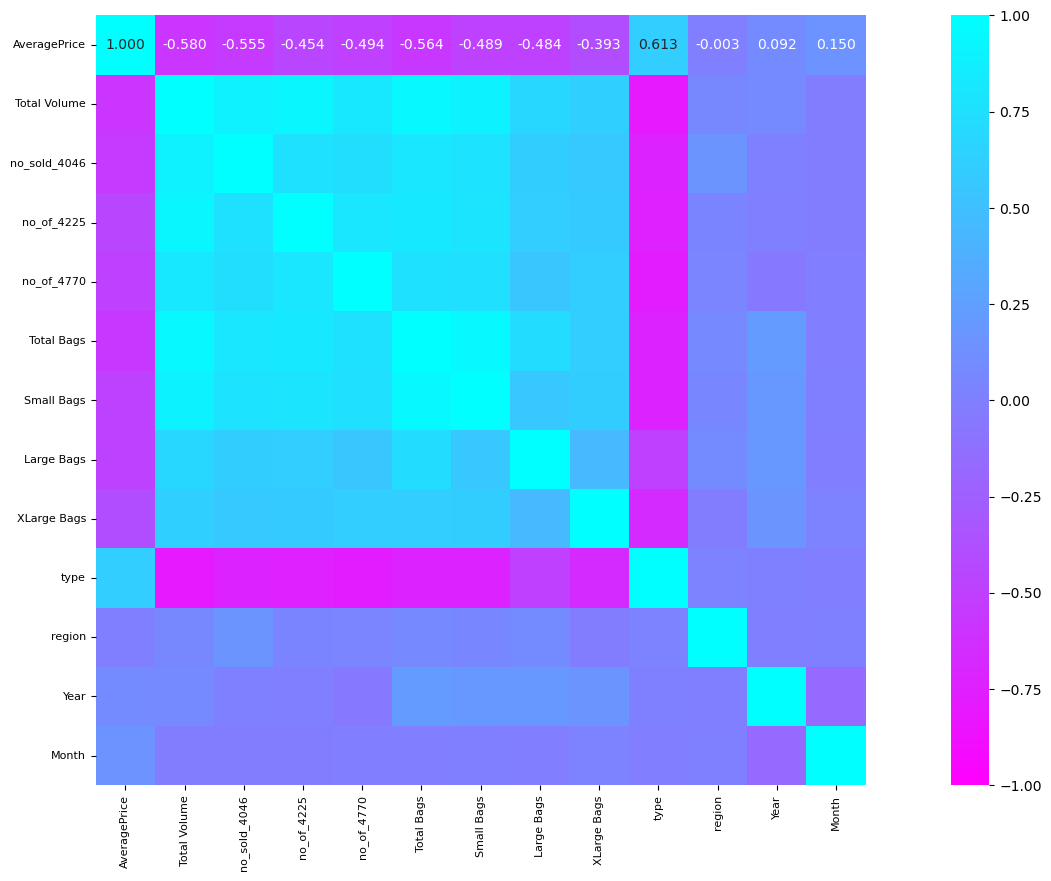

In [29]:
# Lets Visualize the correlation with heatmap
plt.figure(figsize=(22,10))
sns.heatmap(df_class.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool_r")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

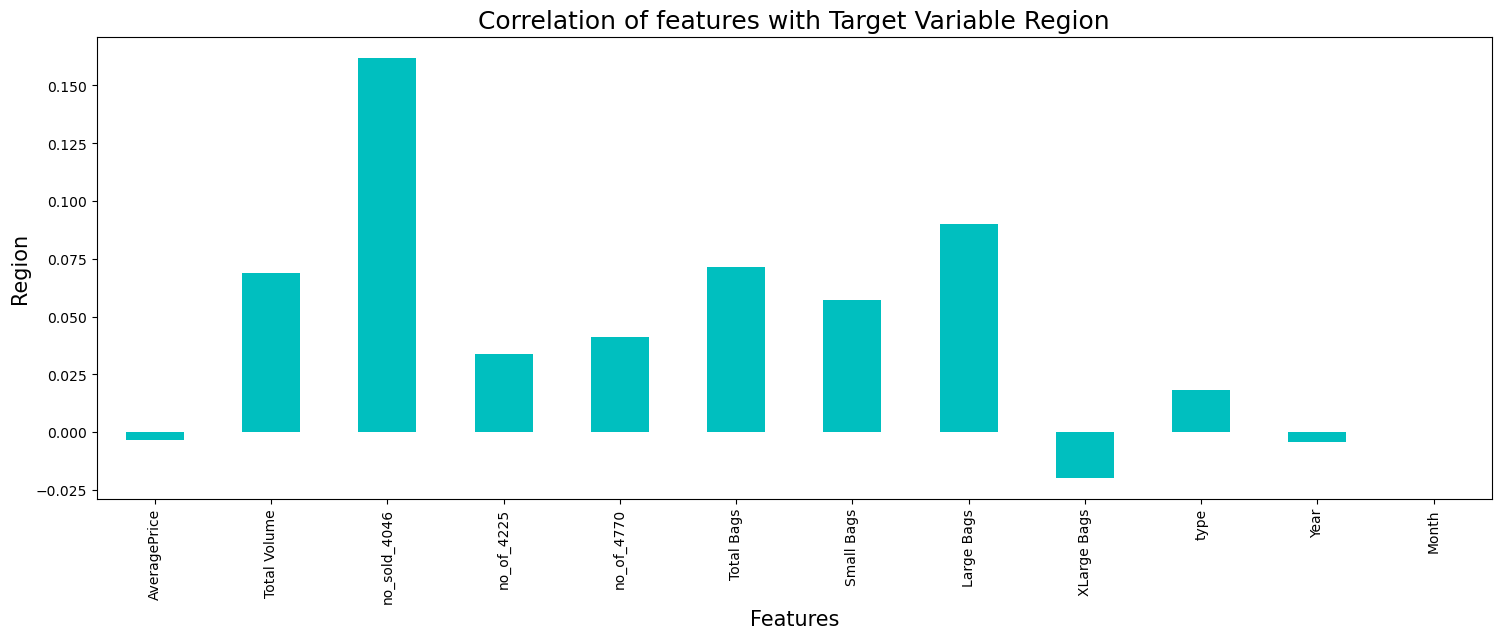

In [30]:
plt.figure(figsize = (18,6))
df_class.corr()['region'].drop(['region']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Region',fontsize=15)
plt.title('Correlation of features with Target Variable Region',fontsize = 18)
plt.show()

### Separate Feature and Label


In [31]:
X=df_class.drop(['region'],axis=1)

In [32]:
Y=df_class['region']

In [33]:
print(f"Shape of feature {X.shape}")
print(f"Shape of Label {Y.shape}")

Shape of feature (17651, 12)
Shape of Label (17651,)


### Using Standard Scaler

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X

,AveragePrice,Total Volume,no_sold_4046,no_of_4225,no_of_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month
0,-0.195352,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210013,1.644612
1,-0.143510,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210013,1.644612
2,-1.232207,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210013,1.644612
3,-0.843387,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210013,1.644612
4,-0.324959,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210013,1.362113
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309,1.980756,-1.180379
17647,0.789660,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309,1.980756,-1.462878
17648,1.204402,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309,1.980756,-1.462878
17649,1.359930,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309,1.980756,-1.462878


### Checking Multicollinearity between features using variance_inflation_factor

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF values,Features
0,2.282519,AveragePrice
1,54.880154,Total Volume
2,6.915889,no_sold_4046
3,12.459228,no_of_4225
4,3.967527,no_of_4770
5,36.069091,Total Bags
6,17.303824,Small Bags
7,3.477601,Large Bags
8,2.047292,XLarge Bags
9,4.204374,type


#### Comment :
    It is natural to have such high multicollinearity due to following reason :-
     Total Volume ,no_sold_4046, Total Bags,Small Bags are highly correlated with each other.
    Another most important reason is data need to scale which we did not scale until now.
    Strategy to Address Multicollinearity :
    Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each     other either moderated or poorly.
    Another way to address Multicollinerity is to Scaled Data and then apply PCA.
    We will go by Second way for further investigation.

### Using PCA

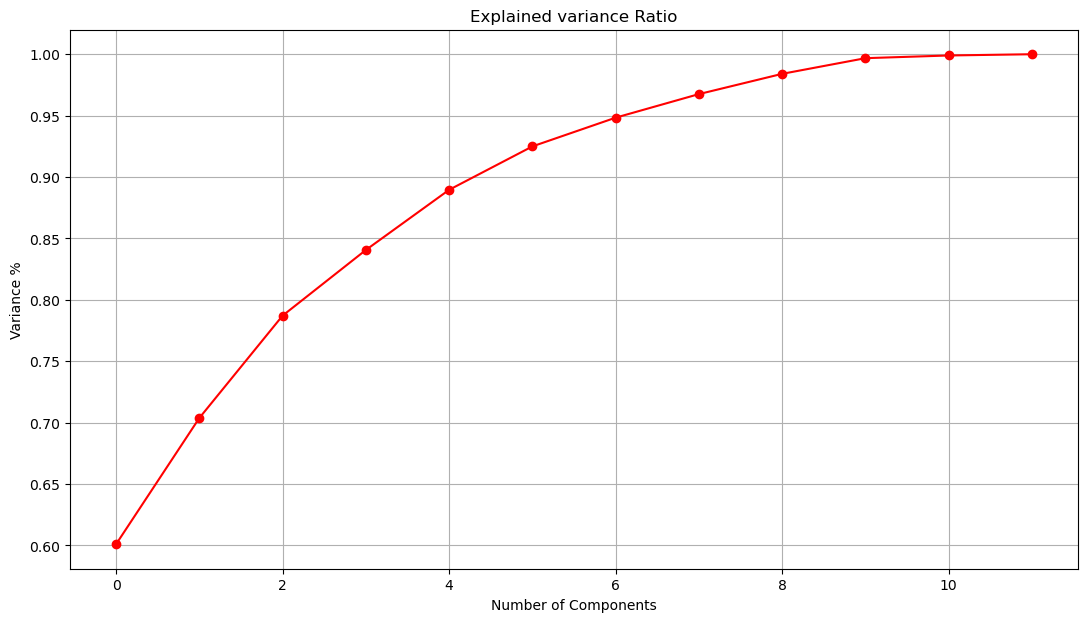

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x = pca.fit_transform(X)
plt.figure(figsize=(13,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

here we see the most distribution variance in 9 feature so we can apply only 9 feature rest can drop the feature.

In [37]:
pca_class = PCA(n_components=9)
x = pca_class.fit_transform(x)

In [38]:
x_class=pd.DataFrame(x,columns=np.arange(9))

In [39]:
# Check VIF after PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(x_class.values,i) for i in range(x_class.shape[1])]
vif['Features']= x_class.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8


We can observe the Multicollinearity issue has cleared

# Model Building For Classification Problem

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

In [45]:
# Find the Random State for best Accuracy
Accuracy_max=0
Random_state_max=0
for random in range(40,80):
    x_train,x_test,y_train,y_test=train_test_split(x_class,Y,test_size=0.25,random_state=random)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy>Accuracy_max:
        Accuracy_max=accuracy
        Random_state_max=random
print(f"Best accuracy is: {Accuracy_max} at random_state: {Random_state_max}")

Best accuracy is: 0.8876048039882166 at random_state: 48


So here we observe that Random forest Classifier have best accuracy with 48 random state.

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_class,Y,test_size=0.25,random_state=48)

In [47]:
all_model=[RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,DecisionTreeClassifier,KNN,SVC]
for model in all_model:
    obj=model()
    obj.fit(x_train,y_train)
    predict=obj.predict(x_test)
    pred_train= obj.predict(x_train)
    print(f"-------------Accuracy with {str (model)}-----------------")
    print("Accuracy :",accuracy_score(y_test,predict))
    print("Acuracy on trained data :",accuracy_score(y_train,pred_train)*100)
    print(confusion_matrix(y_test,predict))
#     print(classification_report(y_test,predict))
    
    print(f"*******Check the validation Score***********")
    score=cross_val_score(obj,X,Y,cv=10)
    print(score)
    print('val-score : ',score.mean())
    print(f"Difference between Accuracy score and cross validation score is : {accuracy_score(y_test,predict)-score.mean()}")
    print()

-------------Accuracy with <class 'sklearn.ensemble._forest.RandomForestClassifier'>-----------------
Accuracy : 0.888737820077045
Acuracy on trained data : 100.0
[[86  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 83 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  0  0 ...  0  0 65]]
*******Check the validation Score***********
[0.82389581 0.80566572 0.83172805 0.82832861 0.81756374 0.74164306
 0.70764873 0.71954674 0.65042493 0.74504249]
val-score :  0.7671487877728193
Difference between Accuracy score and cross validation score is : 0.1215890323042258

-------------Accuracy with <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>-----------------
Accuracy : 0.7230908678903241
Acuracy on trained data : 96.1550083094123
[[67  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  3]
 [ 0  0 79 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  0  0 ...  0  0 51]]
*******Check the validation Score***********
[0.72593431 0.68895184 0.7801

On basis of maximum score in cross validation of Random Forest Classifier. we will apply Hyperparameter tuning on RandomForestClassifier.

### Hyper Para tuning with Grid Search CV

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameter = {
            'n_estimators' : [50,100,150],
            'criterion' : ['gini', 'entropy'],
            'max_features':['sqrt','log2'],
            'ccp_alpha':[0.1,0.0,0.2],
            'random_state':[10,20,42]
             }

In [50]:
gcv_cl = GridSearchCV(RandomForestClassifier(),parameter,verbose=3,cv=5)
gcv_cl.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_features=sqrt, n_estimators=50, random_state=10;, score=0.020 total time=   4.8s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_features=sqrt, n_estimators=50, random_state=10;, score=0.020 total time=   5.2s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_features=sqrt, n_estimators=50, random_state=10;, score=0.020 total time=   4.7s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_features=sqrt, n_estimators=50, random_state=10;, score=0.021 total time=   5.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_features=sqrt, n_estimators=50, random_state=10;, score=0.021 total time=   5.1s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_features=sqrt, n_estimators=50, random_state=20;, score=0.020 total time=   4.8s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_features=sqrt, n_estimators=50, random_state=20;, score=0.021 total time=   5.1s
[CV 3/5] END ccp_alpha=0.1, criter

[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_features=log2, n_estimators=100, random_state=10;, score=0.021 total time=  10.3s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_features=log2, n_estimators=100, random_state=10;, score=0.021 total time=  10.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_features=log2, n_estimators=100, random_state=20;, score=0.021 total time=  10.1s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_features=log2, n_estimators=100, random_state=20;, score=0.021 total time=  10.4s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_features=log2, n_estimators=100, random_state=20;, score=0.021 total time=  11.7s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_features=log2, n_estimators=100, random_state=20;, score=0.021 total time=  11.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_features=log2, n_estimators=100, random_state=20;, score=0.021 total time=   9.7s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_features=log2, n_estimators=100, random_st

[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_features=sqrt, n_estimators=150, random_state=20;, score=0.176 total time=  39.6s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_features=sqrt, n_estimators=150, random_state=20;, score=0.178 total time=  39.7s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_features=sqrt, n_estimators=150, random_state=20;, score=0.207 total time=  40.4s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_features=sqrt, n_estimators=150, random_state=20;, score=0.192 total time=  39.5s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_features=sqrt, n_estimators=150, random_state=42;, score=0.194 total time=  39.9s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_features=sqrt, n_estimators=150, random_state=42;, score=0.200 total time=  40.9s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_features=sqrt, n_estimators=150, random_state=42;, score=0.188 total time=  38.3s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_features=sqrt, n_e

[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=20;, score=0.855 total time=   4.7s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=20;, score=0.859 total time=   4.8s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=42;, score=0.859 total time=   4.7s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=42;, score=0.860 total time=   4.8s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=42;, score=0.859 total time=   4.4s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=42;, score=0.857 total time=   4.5s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=50, random_state=42;, score=0.851 total time=   4.8s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=sqrt, n_estimators=100, random_state=10;

[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=100, random_state=42;, score=0.868 total time=   9.4s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=100, random_state=42;, score=0.868 total time=   9.1s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=100, random_state=42;, score=0.856 total time=   9.5s
[CV 1/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=150, random_state=10;, score=0.868 total time=  14.3s
[CV 2/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=150, random_state=10;, score=0.866 total time=  15.8s
[CV 3/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=150, random_state=10;, score=0.872 total time=  19.1s
[CV 4/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=150, random_state=10;, score=0.872 total time=  14.7s
[CV 5/5] END ccp_alpha=0.0, criterion=gini, max_features=log2, n_estimators=150, random_st

[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=50, random_state=10;, score=0.854 total time=  35.3s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=50, random_state=10;, score=0.860 total time=  21.3s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=50, random_state=10;, score=0.858 total time=  13.8s
[CV 4/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=50, random_state=10;, score=0.855 total time=  13.6s
[CV 5/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=50, random_state=10;, score=0.856 total time=  13.5s
[CV 1/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=50, random_state=20;, score=0.856 total time=  13.8s
[CV 2/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimators=50, random_state=20;, score=0.858 total time=  13.8s
[CV 3/5] END ccp_alpha=0.0, criterion=entropy, max_features=log2, n_estimato

[CV 4/5] END ccp_alpha=0.2, criterion=gini, max_features=sqrt, n_estimators=100, random_state=10;, score=0.021 total time=  10.9s
[CV 5/5] END ccp_alpha=0.2, criterion=gini, max_features=sqrt, n_estimators=100, random_state=10;, score=0.021 total time=  10.7s
[CV 1/5] END ccp_alpha=0.2, criterion=gini, max_features=sqrt, n_estimators=100, random_state=20;, score=0.021 total time=  11.8s
[CV 2/5] END ccp_alpha=0.2, criterion=gini, max_features=sqrt, n_estimators=100, random_state=20;, score=0.021 total time=  11.5s
[CV 3/5] END ccp_alpha=0.2, criterion=gini, max_features=sqrt, n_estimators=100, random_state=20;, score=0.021 total time=  11.0s
[CV 4/5] END ccp_alpha=0.2, criterion=gini, max_features=sqrt, n_estimators=100, random_state=20;, score=0.021 total time=  13.1s
[CV 5/5] END ccp_alpha=0.2, criterion=gini, max_features=sqrt, n_estimators=100, random_state=20;, score=0.021 total time=  12.6s
[CV 1/5] END ccp_alpha=0.2, criterion=gini, max_features=sqrt, n_estimators=100, random_st

[CV 3/5] END ccp_alpha=0.2, criterion=gini, max_features=log2, n_estimators=150, random_state=20;, score=0.021 total time=  16.3s
[CV 4/5] END ccp_alpha=0.2, criterion=gini, max_features=log2, n_estimators=150, random_state=20;, score=0.021 total time=  16.6s
[CV 5/5] END ccp_alpha=0.2, criterion=gini, max_features=log2, n_estimators=150, random_state=20;, score=0.021 total time=  16.4s
[CV 1/5] END ccp_alpha=0.2, criterion=gini, max_features=log2, n_estimators=150, random_state=42;, score=0.021 total time=  16.6s
[CV 2/5] END ccp_alpha=0.2, criterion=gini, max_features=log2, n_estimators=150, random_state=42;, score=0.021 total time=  16.6s
[CV 3/5] END ccp_alpha=0.2, criterion=gini, max_features=log2, n_estimators=150, random_state=42;, score=0.021 total time=  15.9s
[CV 4/5] END ccp_alpha=0.2, criterion=gini, max_features=log2, n_estimators=150, random_state=42;, score=0.021 total time=  15.9s
[CV 5/5] END ccp_alpha=0.2, criterion=gini, max_features=log2, n_estimators=150, random_st

[CV 5/5] END ccp_alpha=0.2, criterion=entropy, max_features=log2, n_estimators=50, random_state=20;, score=0.117 total time=  13.5s
[CV 1/5] END ccp_alpha=0.2, criterion=entropy, max_features=log2, n_estimators=50, random_state=42;, score=0.141 total time=  13.2s
[CV 2/5] END ccp_alpha=0.2, criterion=entropy, max_features=log2, n_estimators=50, random_state=42;, score=0.130 total time=  13.4s
[CV 3/5] END ccp_alpha=0.2, criterion=entropy, max_features=log2, n_estimators=50, random_state=42;, score=0.128 total time=  13.2s
[CV 4/5] END ccp_alpha=0.2, criterion=entropy, max_features=log2, n_estimators=50, random_state=42;, score=0.147 total time=  13.7s
[CV 5/5] END ccp_alpha=0.2, criterion=entropy, max_features=log2, n_estimators=50, random_state=42;, score=0.151 total time=  13.9s
[CV 1/5] END ccp_alpha=0.2, criterion=entropy, max_features=log2, n_estimators=100, random_state=10;, score=0.124 total time=  27.5s
[CV 2/5] END ccp_alpha=0.2, criterion=entropy, max_features=log2, n_estimat

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.0, 0.2],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150],
                         'random_state': [10, 20, 42]},
             verbose=3)

In [51]:
gcv_cl.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 150,
 'random_state': 10}

In [56]:
final_model_cl=RandomForestClassifier(ccp_alpha=0.0,criterion='gini',max_features='sqrt',n_estimators=150,random_state=10)
final_model_cl.fit(x_train,y_train)
pred_cl=final_model_cl.predict(x_test)
acc_cl=accuracy_score(y_test,pred_cl)
print(acc_cl*100)

88.42057557217312


### Save the model


In [60]:
import joblib
joblib.dump(final_model_cl,'avocado_region.pkl')

['avocado_region.pkl']

In [61]:
# lets load the saved model and get the predictions
model_cl=joblib.load("avocado_region.pkl")

# prediction
prediction_cl=model_cl.predict(x_test)
prediction_cl

array([23, 48, 42, ..., 10,  8, 50])

In [63]:
a_cl=np.array(y_test)
df_cl=pd.DataFrame()
df_cl["Predicted"]=prediction_cl
df_cl["Original"]=a_cl
df_cl

,Predicted,Original
0,23,23
1,48,48
2,42,42
3,43,43
4,22,22
...,...,...
4408,51,51
4409,4,4
4410,10,10
4411,8,8


#### Conclusion:

In this project, we developed a multiclass classification model to predict region based on various features such as type, year, and volume of sales,Large Bags,Small Bags,Total Bags etc. Among the models tested, insert the best-performing algorithm, e.g RandomForestClassifier ensemble provided the most accurate predictions. We fine-tuned the hyperparameters, including list key hyperparameters, e.g. number of estimators,ccp_alpha,criterion,random_state parameters to enhance the model's performance.

The final model achieved with 88% accuracy and a best classification report with high precision and demonstrated strong predictive capabilities. The results highlight the effectiveness of machine learning in predictive region.